<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#here" data-toc-modified-id="here-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>here</a></span></li><li><span><a href="#build-ep" data-toc-modified-id="build-ep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>build ep</a></span></li><li><span><a href="#right-hand-10-don" data-toc-modified-id="right-hand-10-don-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>right hand 10 don</a></span></li><li><span><a href="#manually" data-toc-modified-id="manually-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>manually</a></span><ul class="toc-item"><li><span><a href="#build-don" data-toc-modified-id="build-don-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>build don</a></span></li></ul></li></ul></div>

In [1]:
import taiko as tk
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime, timedelta
from collections import deque
from scipy.stats import mode
sns.set()

pd.options.display.float_format = '{:,.4f}'.format

# preprocessing.primitive
RMS_COLS = ['a_rms', 'g_rms', 'imu_ax', 'imu_ay', 'imu_az', 'imu_gx', 'imu_gy', 'imu_gz']

Using TensorFlow backend.


In [2]:
def resample(df):
    play_df = df
    play_df.loc[:, 'timestamp'] = pd.to_datetime(play_df['timestamp'], unit='s')
    play_df = play_df.set_index('timestamp').resample('0.02S').mean()
    play_df = play_df.interpolate(method='linear')
    play_df.reset_index(inplace=True)
    play_df.loc[:, 'timestamp'] = play_df['timestamp'].apply(
        lambda x: x.timestamp())
    play_df.fillna(method='ffill', inplace=True)
    return play_df

In [3]:
def calibrate(df):
    copy_df = df.copy()
    for col in RMS_COLS[2:]:
        mode_ = mode(copy_df[col])[0]
        copy_df.loc[:, col] = copy_df[col] - mode_
        
    return copy_df    

In [4]:
left_path = '../data/my_left_forearm_csv/'
right_path = '../data/my_right_forearm_csv/'
files = next(os.walk(left_path))[2]
files.sort()
print(files)
left_arm_df = pd.read_csv(left_path + files[3])
left_arm_df = calibrate(left_arm_df)
left_arm_df = resample(left_arm_df)

files = next(os.walk(right_path))[2]
files.sort()
right_arm_df = pd.read_csv(right_path + files[3])
right_arm_df = calibrate(right_arm_df)
right_arm_df = resample(right_arm_df)

left_arm_df['arm'] = 'left'
right_arm_df['arm'] = 'right'
arm_df = pd.concat([left_arm_df, right_arm_df], ignore_index=True)
arm_df[RMS_COLS[0]] = (arm_df[RMS_COLS[2]] ** 2 +
                       arm_df[RMS_COLS[3]] ** 2 +
                       arm_df[RMS_COLS[4]] ** 2).apply(math.sqrt)
# gyroscope movement intensity (GMI)
arm_df[RMS_COLS[1]] = (arm_df[RMS_COLS[5]] ** 2 +
                       arm_df[RMS_COLS[6]] ** 2 +
                       arm_df[RMS_COLS[7]] ** 2).apply(math.sqrt)
arm_df

['2018-09-10_215508.csv', '2018-09-10_220411p.csv', '2018-09-10_220650.csv', '2018-09-11_225858p.csv', '2018-09-12_151958_lpause.csv']


,timestamp,imu_ax,imu_ay,imu_az,imu_gx,imu_gy,imu_gz,arm,a_rms,g_rms
0,"1,536,677,938.3000",-2.2536,-1.7807,1.9267,-0.5493,4.7760,3.8757,left,3.4586,6.1752
1,"1,536,677,938.3200",-2.1660,-1.7921,1.9173,-0.8545,4.2928,4.8320,left,3.4028,6.5197
2,"1,536,677,938.3400",-2.1008,-1.8584,2.0073,-1.4852,5.1541,5.8797,left,3.4492,7.9588
3,"1,536,677,938.3600",-2.1075,-1.8555,2.0856,-1.8107,7.8803,6.3137,left,3.4977,10.2587
4,"1,536,677,938.3800",-2.1770,-1.8828,2.0796,-2.1362,10.1319,6.4240,left,3.5509,12.1855
5,"1,536,677,938.4000",-2.2886,-1.9553,2.0201,-2.7805,10.8507,6.1035,left,3.6252,12.7563
6,"1,536,677,938.4200",-2.3918,-2.0369,2.0641,-3.2807,10.8948,5.0812,left,3.7590,12.4610
7,"1,536,677,938.4400",-2.4630,-1.9578,2.1284,-3.9499,10.5852,3.4616,left,3.7986,11.8166
8,"1,536,677,938.4600",-2.5463,-1.9211,2.1431,-4.4098,8.8806,1.8005,left,3.8428,10.0774
9,"1,536,677,938.4800",-2.5727,-1.9896,2.1593,-3.9130,6.8834,0.8613,left,3.9038,7.9646


# here

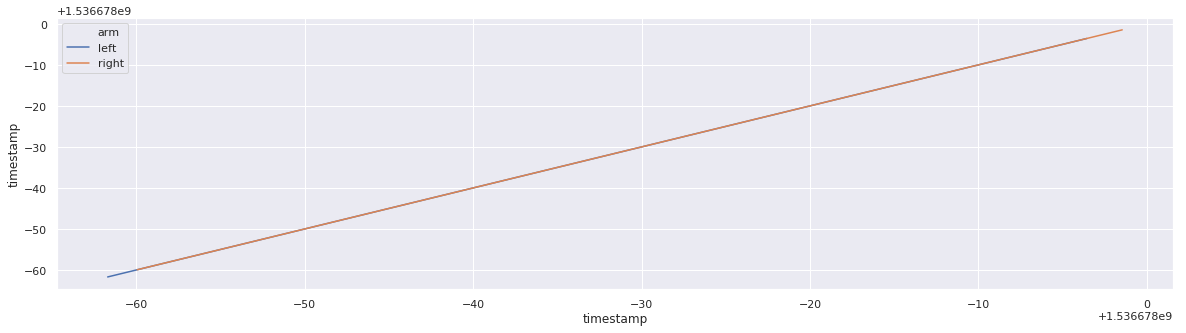

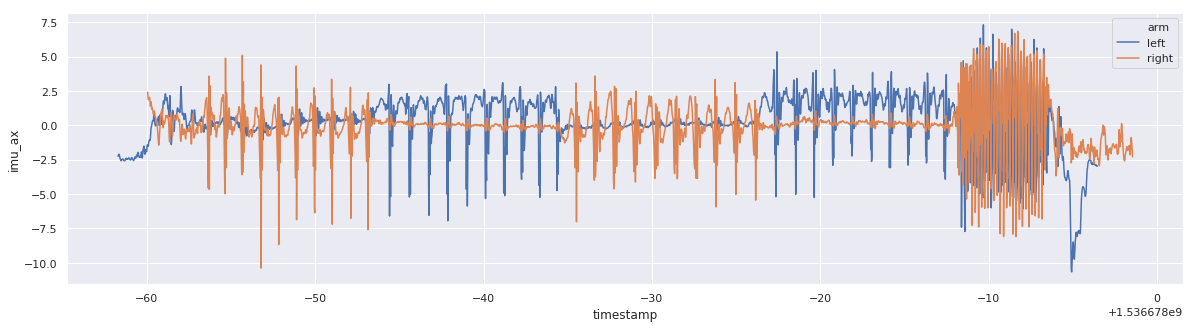

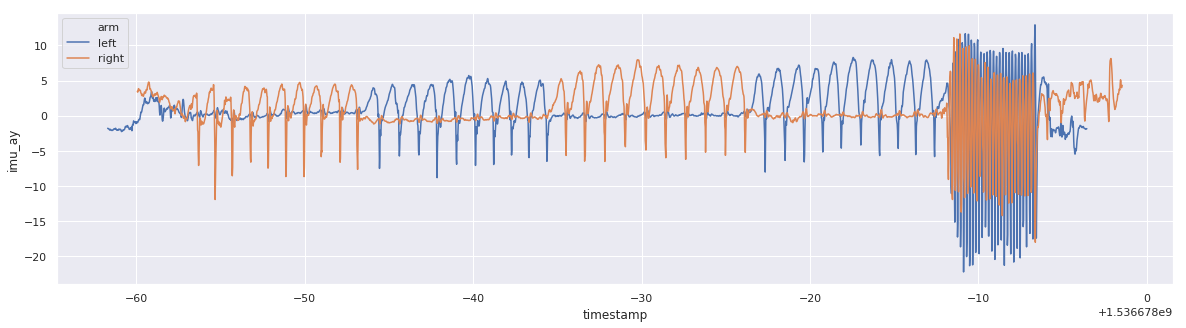

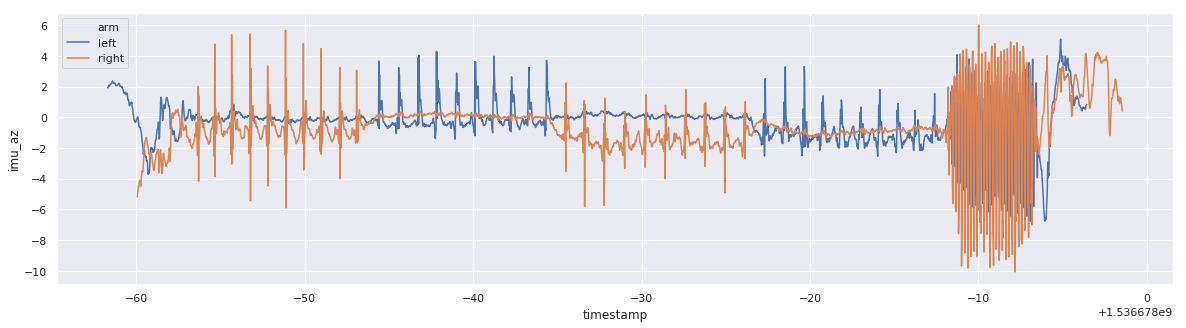

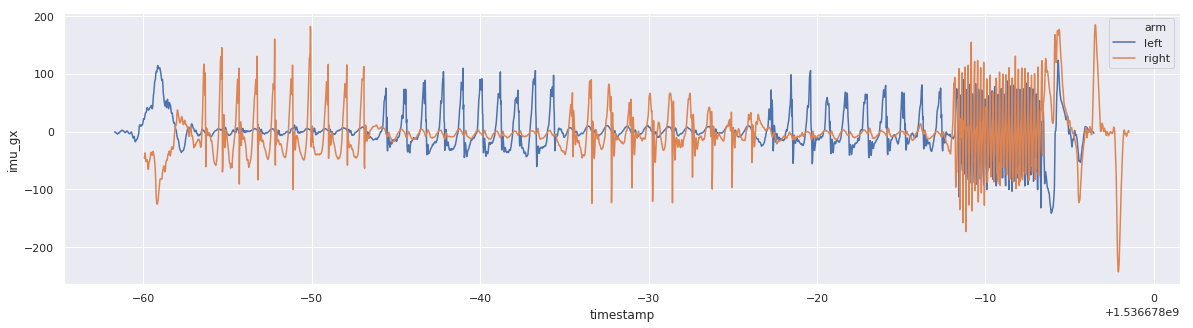

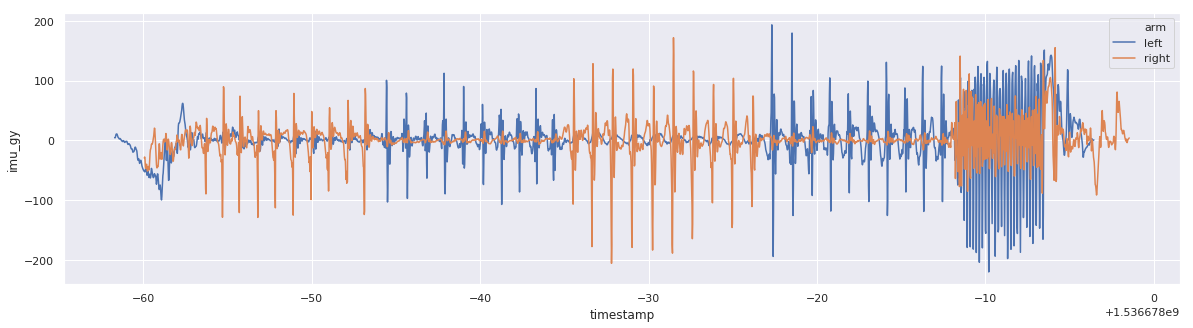

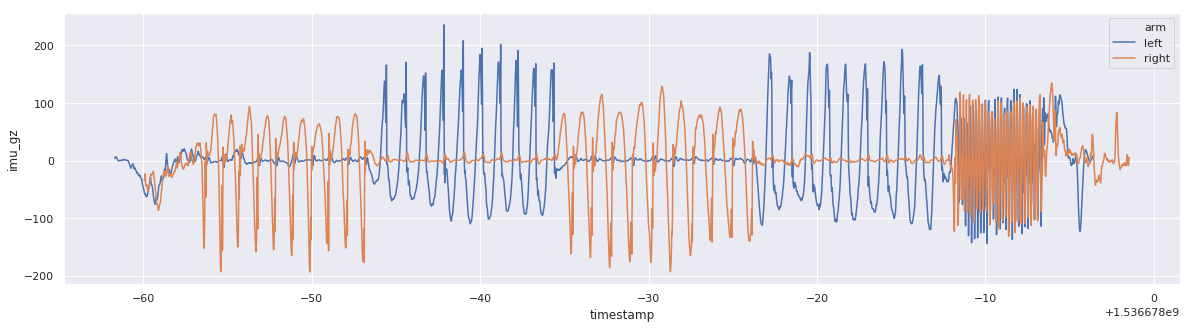

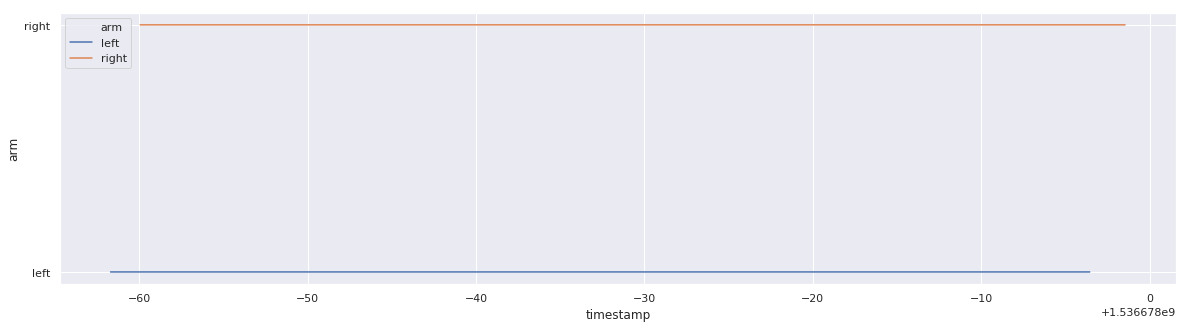

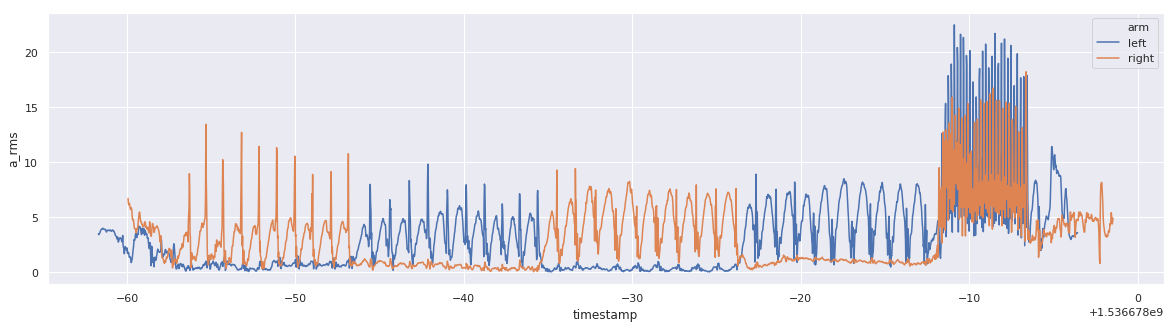

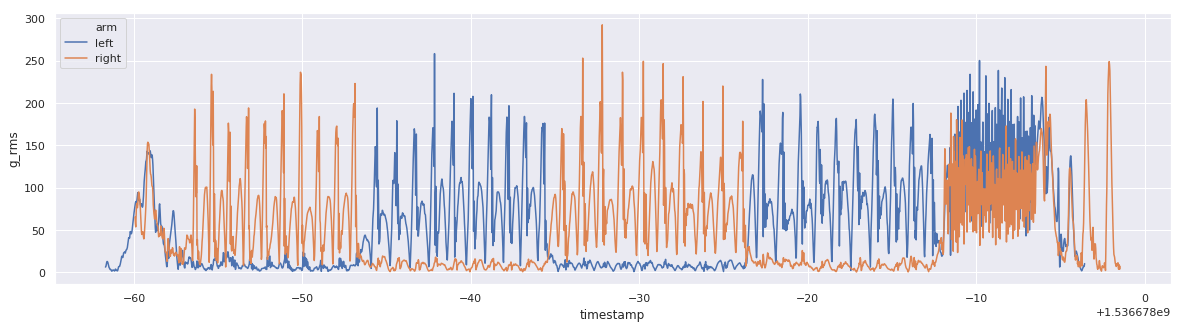

In [5]:
for col in arm_df.columns:
    plt.figure(figsize=(20, 5))
    sns.lineplot(x='timestamp', y=col, data=arm_df, estimator=None, hue='arm')
    plt.show()

# build ep

In [6]:
def crop(arm_df, start_time, end_time, hand):
    crop_df = arm_df[(arm_df.timestamp >= start_time) & (
        arm_df.timestamp <= end_time) & (arm_df.arm == hand)].copy()
    return crop_df

In [7]:
def build_ep_part(start_time, end_time, hand, hit_type):
    don_df = arm_df[(arm_df.timestamp >= start_time) & (
        arm_df.timestamp <= end_time) & (arm_df.arm == hand)].copy()

    play_df = don_df.copy()
    plt.figure(figsize=(20, 5))
    sns.lineplot(x='timestamp', y='g_rms', data=play_df, estimator=None)
    plt.show()
    
    peaks = []

    ls = list(zip(play_df.timestamp, play_df.g_rms))

    for i_ in range(1, len(ls) - 1):
        now = ls[i_][1]
        prev_ = ls[i_ - 1][1]
        next_ = ls[i_ + 1][1]
        if (now > prev_ and now > next_) or (now > prev_ and now > next_):
            peaks.append((ls[i_][0], now))

    peaks.sort(key=lambda tup: tup[1], reverse=True)
    peaks = peaks[:10]
    peaks.sort()
    df = pd.DataFrame(columns=['timestamp', 'g_rms'], data=peaks)
    timediff_df = df.diff().dropna()
    timediff_df = timediff_df.rename(columns={'timestamp': 'timediff'})
    print(df)
    sns.distplot(timediff_df.timediff)
    plt.show()
    print(np.std(timediff_df.timediff))
    print(np.mean(timediff_df.timediff))
    print(np.std(df.g_rms))
    print(np.mean(df.g_rms))
    
    delta_t = float(np.mean(timediff_df.timediff) / 2.0)

In [8]:
def create_ep(start_time, end_time, hit_type):
    tmp_primitive_mat = []
    
    windows = [deque() for _ in range(2)]
    left_window_df = left_arm_df[(left_arm_df.timestamp >= start_time) & (left_arm_df.timestamp <= end_time)]
    right_window_df = right_arm_df[(right_arm_df.timestamp >= start_time) & (right_arm_df.timestamp <= end_time)]

    for id_, row in left_window_df.iterrows():
        windows[0].append(row)
    
    for id_, row in right_window_df.iterrows():
        windows[1].append(row)

    feature_row = tk.get_features(windows)
    tmp_primitive_mat.append([hit_type] + feature_row)
    columns = tk.get_feature_columns(['L', 'R'])
    event_primitive_df = pd.DataFrame(data=tmp_primitive_mat,
                                      columns=['hit_type'] + columns)
    return event_primitive_df

# right hand 10 don

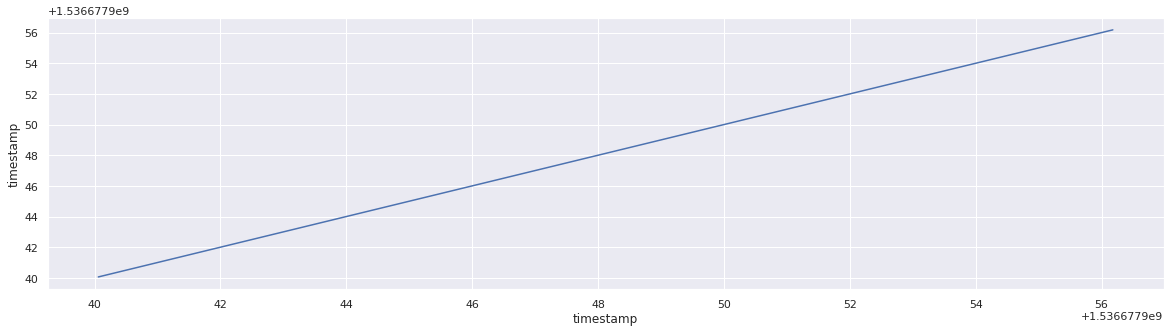

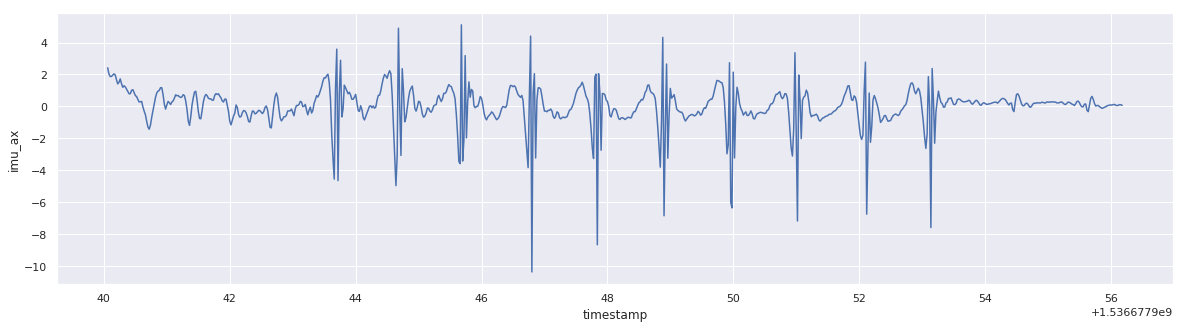

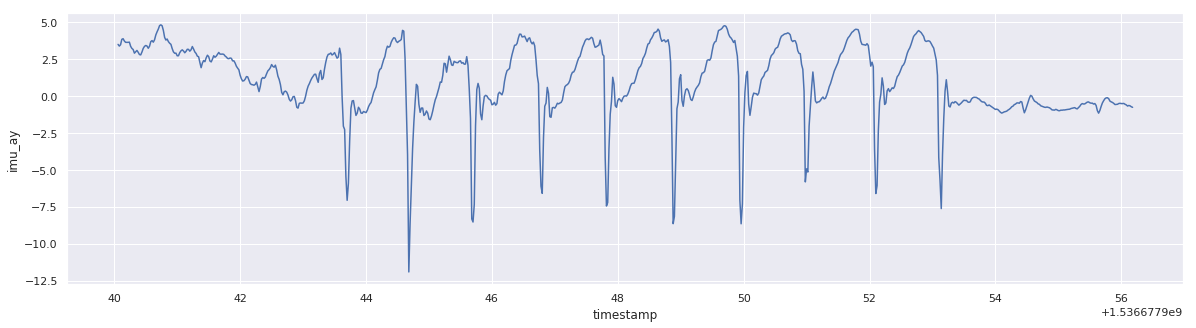

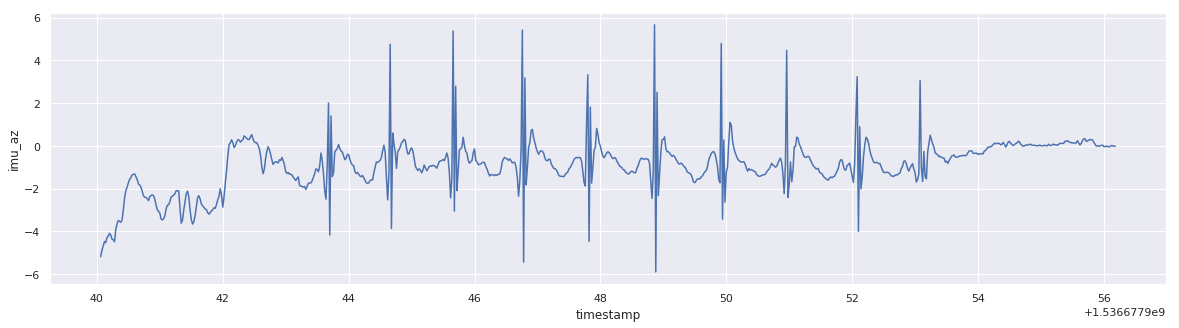

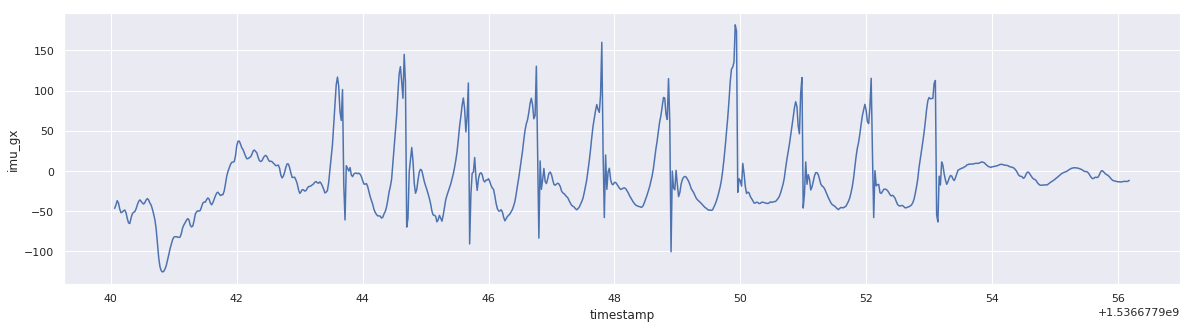

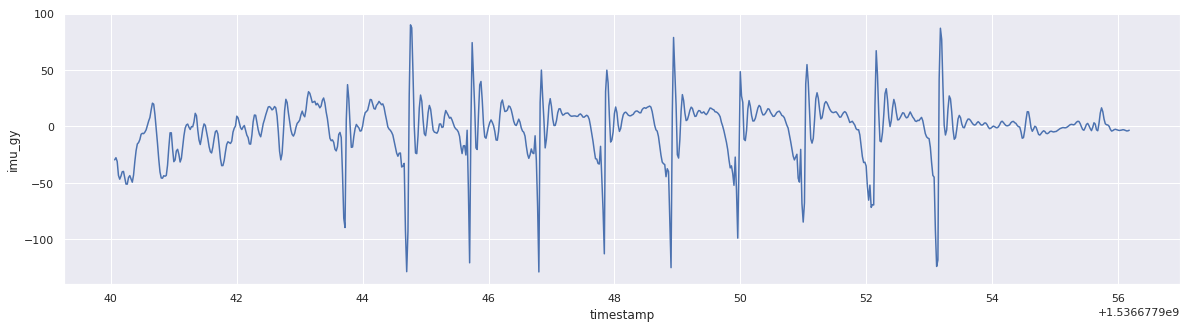

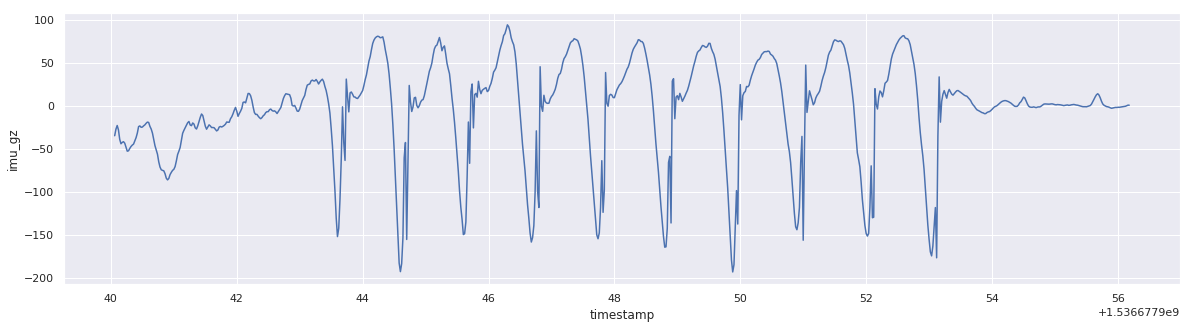

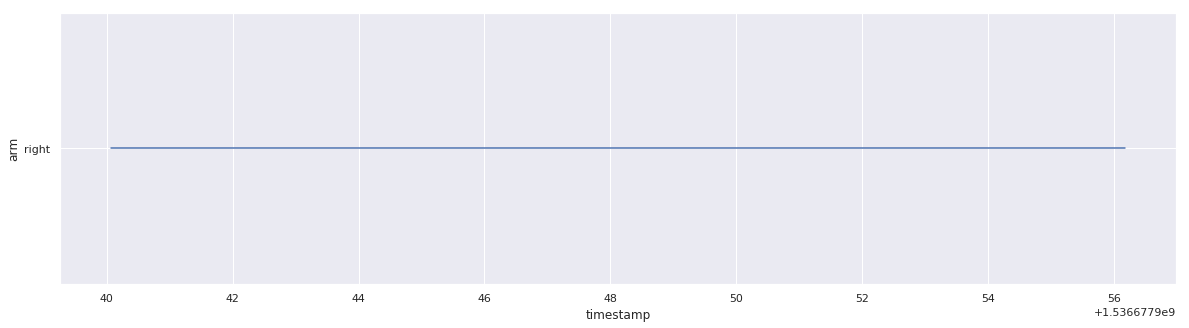

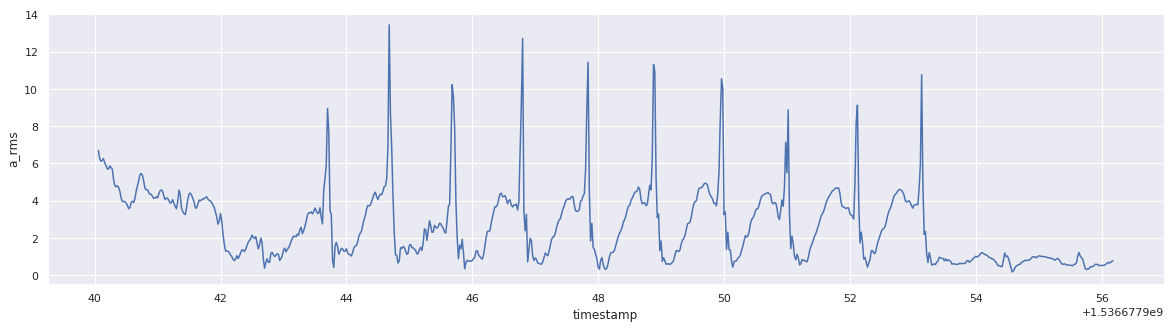

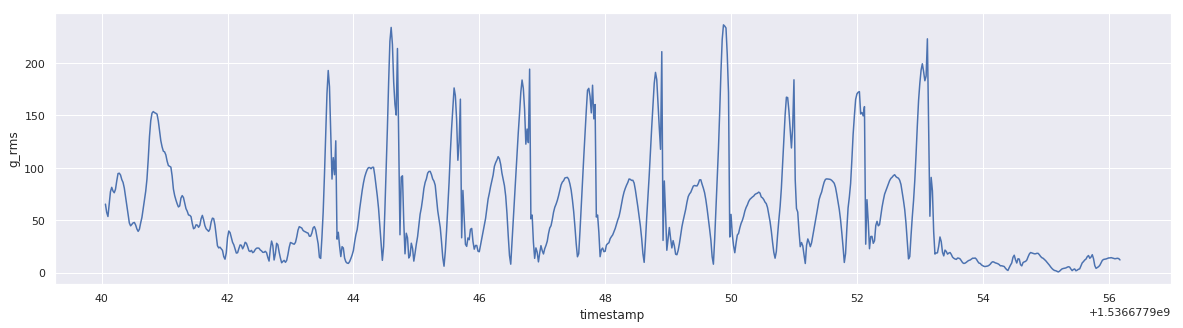

In [21]:
df = crop(arm_df, 1536677943.60 - 20, 1536677943.60 + 1.05 * 12, 'right')
for col in df.columns:
    plt.figure(figsize=(20, 5))
    sns.lineplot(x='timestamp', y=col, data=df, estimator=None)
    plt.show()

# manually

right don => 1536677943.60, 1.05

left don => 1536677954.44, 1.2

right ka => 1536677966.64, 1.2

left ka => 1536677977.18, 1.1

drumroll => 1536677990, +2

* another df

pause => 1536736810, +5

## build don

In [9]:
ep_dfs = []

# right don
cal_start_time = 1536677943.60
inv = 1.05
for ts in [cal_start_time + offset * inv for offset in range(10)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 1)
    ep_dfs.append(ep_df)

# left don
cal_start_time = 1536677954.44
inv = 1.2
for ts in [cal_start_time + offset * inv for offset in range(10)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 1)
    ep_dfs.append(ep_df)

# right_ka
cal_start_time = 1536677966.64
inv = 1.2
for ts in [cal_start_time + offset * inv for offset in range(10)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 2)
    ep_dfs.append(ep_df)

    
# left_ka
cal_start_time = 1536677977.18
inv = 1.1
for ts in [cal_start_time + offset * inv for offset in range(10)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 2)
    ep_dfs.append(ep_df)

# drumroll
cal_start_time = 1536677990
inv = 1.1
for ts in [cal_start_time + offset * inv for offset in range(2)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 3)
    ep_dfs.append(ep_df)

AttributeError: module 'taiko' has no attribute 'get_features'

In [ ]:
left_path = '../data/my_left_forearm_csv/'
right_path = '../data/my_right_forearm_csv/'
files = next(os.walk(left_path))[2]
files.sort()
print(files)
left_arm_df = pd.read_csv(left_path + files[4])
left_arm_df = calibrate(left_arm_df)
left_arm_df = resample(left_arm_df)

files = next(os.walk(right_path))[2]
files.sort()
right_arm_df = pd.read_csv(right_path + files[4])
right_arm_df = calibrate(right_arm_df)
right_arm_df = resample(right_arm_df)

left_arm_df['arm'] = 'left'
right_arm_df['arm'] = 'right'
arm_df = pd.concat([left_arm_df, right_arm_df], ignore_index=True)
arm_df[RMS_COLS[0]] = (arm_df[RMS_COLS[2]] ** 2 +
                       arm_df[RMS_COLS[3]] ** 2 +
                       arm_df[RMS_COLS[4]] ** 2).apply(math.sqrt)
# gyroscope movement intensity (GMI)
arm_df[RMS_COLS[1]] = (arm_df[RMS_COLS[5]] ** 2 +
                       arm_df[RMS_COLS[6]] ** 2 +
                       arm_df[RMS_COLS[7]] ** 2).apply(math.sqrt)
arm_df

In [ ]:
# pause
cal_start_time = 1536736810
inv = 1.1
for ts in [cal_start_time + offset * inv for offset in range(5)]:
    start_time = ts - inv / 2.0
    end_time = ts + inv / 2.0
    ep_df = create_ep(start_time, end_time, 0)
    ep_dfs.append(ep_df)

In [ ]:
event_primitive_df = pd.concat(ep_dfs, ignore_index=True)
event_primitive_df

In [ ]:
event_primitive_df.to_csv('CSV/profile/myprof.csv', float_format='%.4g', index=False)